In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dspp1/product_info.csv
/kaggle/input/dspp1/customer_product.csv
/kaggle/input/dspp1/customer_info.csv
/kaggle/input/dspp1/customer_cases.csv


In [3]:
import pandas as pd 

cust_case_df = pd.read_csv('/kaggle/input/dspp1/customer_cases.csv', index_col=0)
cust_info_df = pd.read_csv('/kaggle/input/dspp1/customer_info.csv', index_col=0)
cust_product_df = pd.read_csv('/kaggle/input/dspp1/customer_product.csv', index_col=0)
prd_info_df= pd.read_csv('/kaggle/input/dspp1/product_info.csv', index_col=0)

In [4]:
display(cust_case_df.info())
cust_case_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330512 entries, 1 to 330512
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   case_id      330512 non-null  object
 1   date_time    330512 non-null  object
 2   customer_id  330512 non-null  object
 3   channel      330512 non-null  object
 4   reason       330512 non-null  object
dtypes: object(5)
memory usage: 15.1+ MB


None

,case_id,date_time,customer_id,channel,reason
1,CC101,2017-01-01 10:32:03,C2448,phone,signup
2,CC102,2017-01-01 11:35:47,C2449,phone,signup
3,CC103,2017-01-01 11:37:09,C2450,phone,signup
4,CC104,2017-01-01 13:28:14,C2451,phone,signup
5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [5]:
display(cust_info_df.info())
cust_info_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508932 entries, 1 to 508932
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  508932 non-null  object
 1   age          508932 non-null  int64 
 2   gender       508932 non-null  object
dtypes: int64(1), object(2)
memory usage: 15.5+ MB


None

,customer_id,age,gender
1,C2448,76,female
2,C2449,61,male
3,C2450,58,female
4,C2451,62,female
5,C2452,71,male


In [6]:
display(cust_product_df.info())
cust_product_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508932 entries, 1 to 508932
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   customer_id       508932 non-null  object
 1   product           508932 non-null  object
 2   signup_date_time  508932 non-null  object
 3   cancel_date_time  112485 non-null  object
dtypes: object(4)
memory usage: 19.4+ MB


None

,customer_id,product,signup_date_time,cancel_date_time
1,C2448,prd_1,2017-01-01 10:35:09,NaN
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
4,C2451,prd_2,2017-01-01 13:32:08,NaN
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [7]:
display(prd_info_df.info())
prd_info_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, prd_1 to prd_2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2 non-null      object
 1   price          2 non-null      int64 
 2   billing_cycle  2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 64.0+ bytes


None

,name,price,billing_cycle
product_id,,,
prd_1,annual_subscription,1200,12
prd_2,monthly_subscription,125,1


Replace Nan values in cancellation date with 'Subscribed'

In [8]:
cust_product_df['cancel_date_time'].fillna('subscribed',inplace=True)

## EDA

In [9]:
print('Number of cancelled users: ',len(cust_product_df)-cust_product_df['cancel_date_time'].value_counts()[0])
print('Number of subscribers: ',cust_product_df['cancel_date_time'].value_counts()[0])

Number of cancelled users:  112485
Number of subscribers:  396447


### Customer cases

<AxesSubplot:>

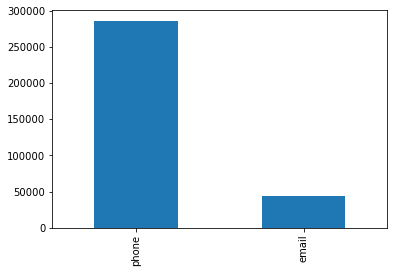

In [10]:
cust_case_df.channel.value_counts().plot.bar()

<AxesSubplot:>

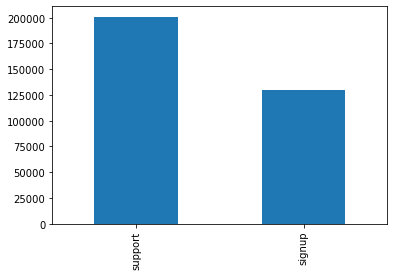

In [11]:
cust_case_df.reason.value_counts().plot.bar()

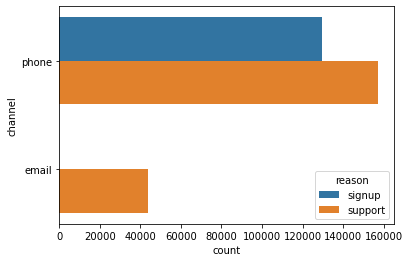

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.countplot(y ='channel', hue = "reason", data = cust_case_df)
 
# Show the plot
plt.show()

In [13]:
cust_case_df['date'] = cust_case_df.date_time.apply(lambda x: x[:10])
cust_case_df['date'] = pd.to_datetime(cust_case_df["date"], format="%Y-%m-%d")

In [14]:
print(cust_case_df.date.max())
print(cust_case_df.date.min())

2022-01-01 00:00:00
2017-01-01 00:00:00


In [15]:
cust_case_df['hour'] = cust_case_df.date_time.apply(lambda x: x[11:13])

<AxesSubplot:>

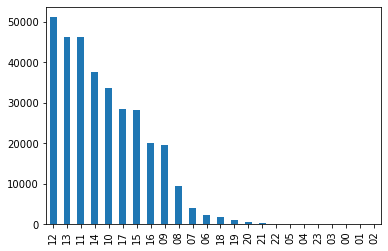

In [16]:
cust_case_df['hour'].value_counts().plot.bar()

In [17]:
cust_case_df['day_of_week'] = cust_case_df['date'].dt.day_name()
cust_case_df['day_of_week'].value_counts()

Monday       56770
Tuesday      53205
Wednesday    51891
Thursday     50633
Friday       46897
Saturday     36999
Sunday       34117
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='date'>

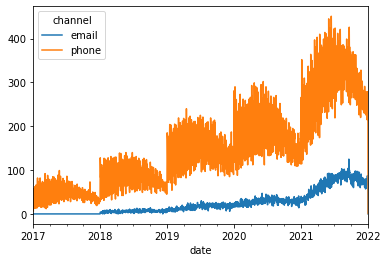

In [18]:
pd.pivot_table(cust_case_df,
              index ='date',
              columns= 'channel',
              values='case_id',
              aggfunc='count').fillna(0).plot()

<AxesSubplot:xlabel='hour'>

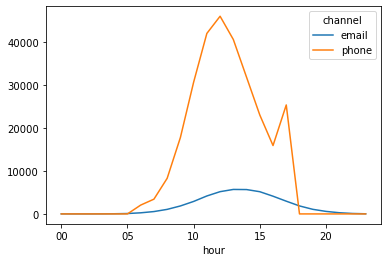

In [19]:
pd.pivot_table(cust_case_df,
              index ='hour',
              columns= 'channel',
              values='case_id',
              aggfunc='count').fillna(0).plot()

<AxesSubplot:xlabel='day_of_week'>

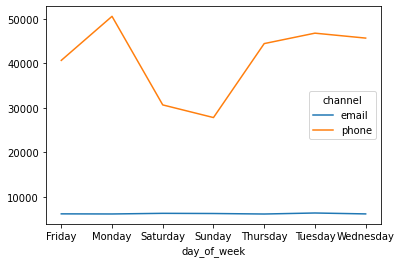

In [20]:
pd.pivot_table(cust_case_df,
              index ='day_of_week',
              columns= 'channel',
              values='case_id',
              aggfunc='count').fillna(0).plot()

In [21]:
len(cust_product_df)

508932

In [22]:
cust_product_df.customer_id.nunique()

508932

In [23]:
cust_product_df['signed_date'] = cust_product_df.signup_date_time.apply(lambda x: x[:10])
cust_product_df['signed_date'] = pd.to_datetime(cust_product_df["signed_date"], format="%Y-%m-%d")

In [24]:
cust_product_df.head()

,customer_id,product,signup_date_time,cancel_date_time,signed_date
1,C2448,prd_1,2017-01-01 10:35:09,subscribed,2017-01-01
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,2017-01-01
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,2017-01-01
4,C2451,prd_2,2017-01-01 13:32:08,subscribed,2017-01-01
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,2017-01-01


In [25]:
def cancelled_dt(x):
    if x!='subscribed':
        x = x[:10]
    else:
        pass
    return x
cust_product_df['cancelled_date'] = cust_product_df.cancel_date_time.apply(lambda x: cancelled_dt(x))
cust_product_df.head()

,customer_id,product,signup_date_time,cancel_date_time,signed_date,cancelled_date
1,C2448,prd_1,2017-01-01 10:35:09,subscribed,2017-01-01,subscribed
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,2017-01-01,2021-09-05
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,2017-01-01,2019-01-13
4,C2451,prd_2,2017-01-01 13:32:08,subscribed,2017-01-01,subscribed
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,2017-01-01,2021-06-28


<AxesSubplot:xlabel='signed_date'>

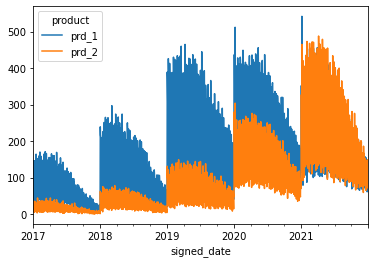

In [26]:
pd.pivot_table(cust_product_df,
              index ='signed_date',
              columns= 'product',
              values='customer_id',
              aggfunc='count').fillna(0).plot()

<AxesSubplot:xlabel='cancelled_date'>

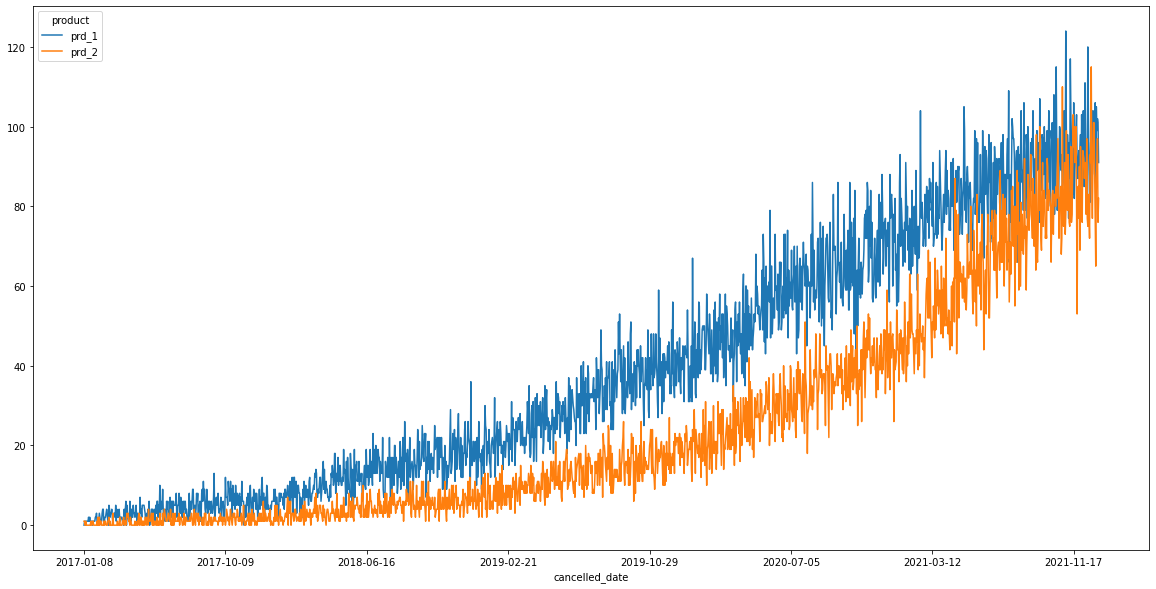

In [27]:
plt.rcParams["figure.figsize"] = (20,10)

pd.pivot_table(cust_product_df[cust_product_df['cancelled_date']!='subscribed'],
              index ='cancelled_date',
              columns= 'product',
              values='customer_id',
              aggfunc='count').fillna(0).plot()

## Merge tables

In [28]:
combined_df = cust_info_df.merge(cust_product_df,how='inner',on='customer_id')
combined_df.head()

,customer_id,age,gender,product,signup_date_time,cancel_date_time,signed_date,cancelled_date
0,C2448,76,female,prd_1,2017-01-01 10:35:09,subscribed,2017-01-01,subscribed
1,C2449,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,2017-01-01,2021-09-05
2,C2450,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,2017-01-01,2019-01-13
3,C2451,62,female,prd_2,2017-01-01 13:32:08,subscribed,2017-01-01,subscribed
4,C2452,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,2017-01-01,2021-06-28


In [29]:
combined_df[combined_df['cancel_date_time']!='subscribed'].gender.value_counts()

male      68256
female    44229
Name: gender, dtype: int64

<AxesSubplot:>

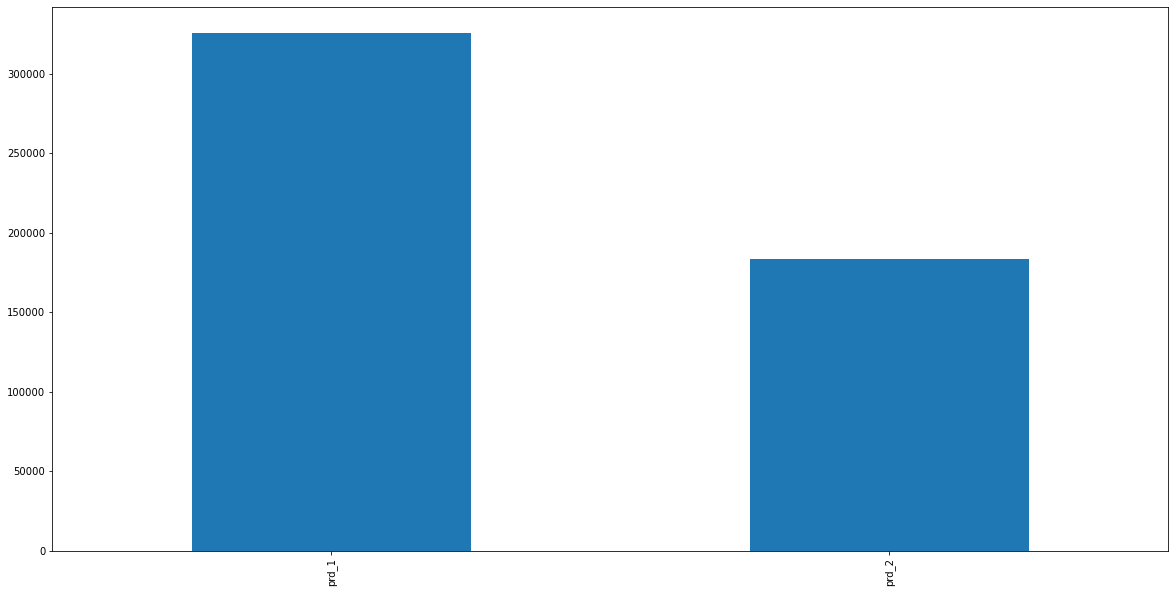

In [30]:
cust_product_df['product'].value_counts().plot.bar()

In [31]:
prd_info_df.name.unique()

array(['annual_subscription', 'monthly_subscription'], dtype=object)

<AxesSubplot:>

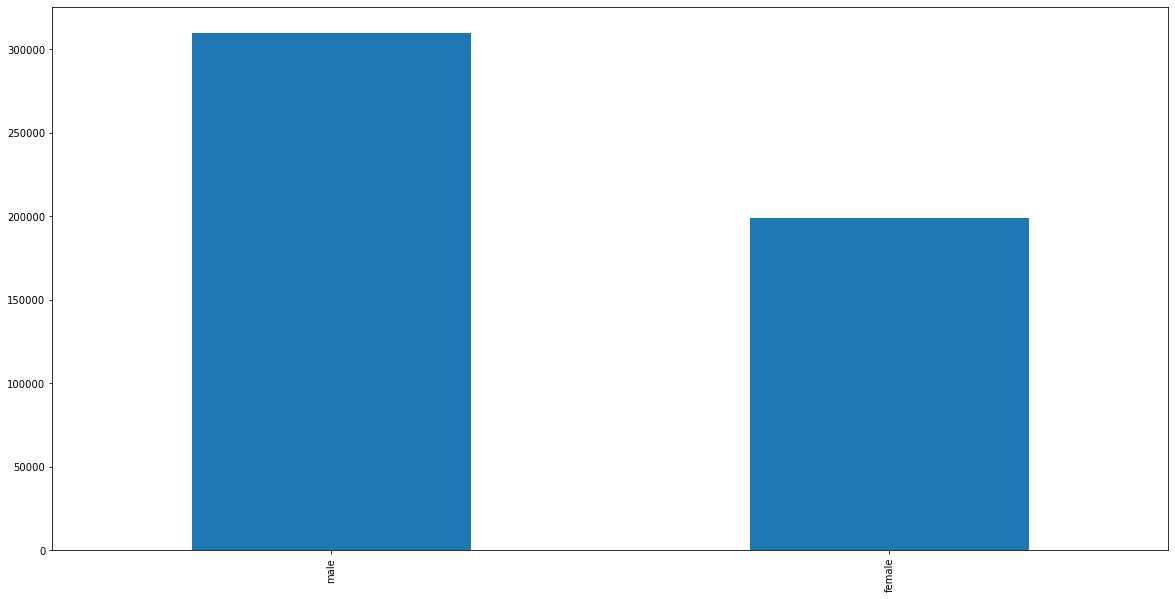

In [32]:
cust_info_df.gender.value_counts().plot.bar()

<AxesSubplot:>

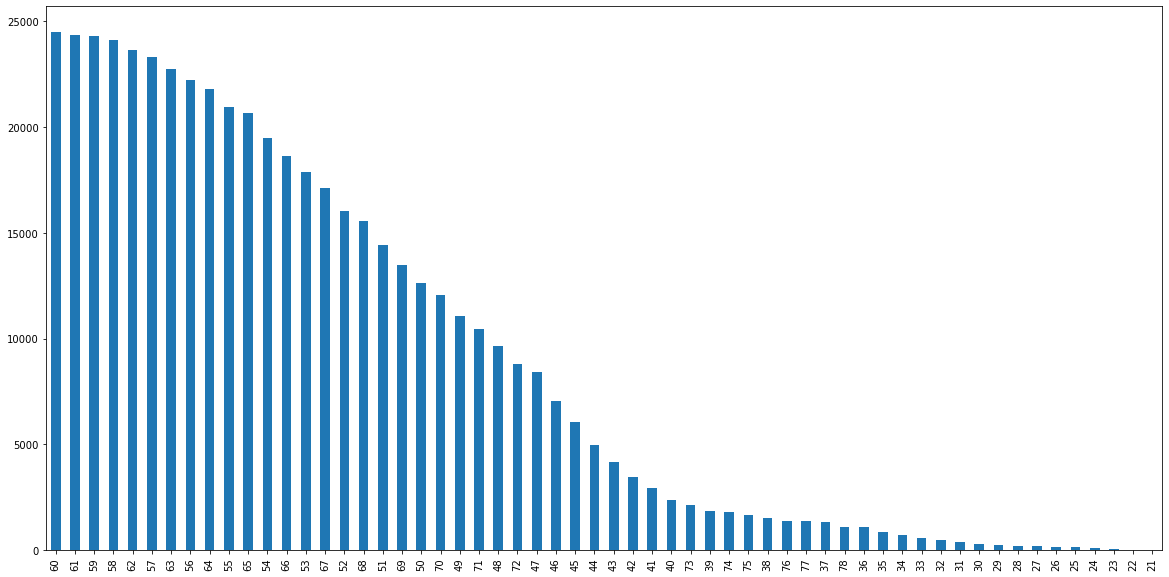

In [33]:
cust_info_df.age.value_counts().plot.bar()

## How To Isolate Trend, Seasonality And Noise From A Time Series

A time series can be thought of as being made of 4 components:

- A seasonal component: The seasonal component explains the periodic ups and downs

- A trend component: The Trend component refers to the pattern in the data that spans across seasonal periods.

- A cyclical component: The cyclical component represents phenomena that happen across seasonal periods. Cyclical patterns do not have a fixed period like seasonal patterns do. An example of a cyclical pattern is the cycles of boom and bust that stock markets experience in response to world events.

- A noise component: The noise or the random component is what remains behind when you separate out seasonality and trend from the time series. Noise is the effect of factors that you do not know, or which you cannot measure. It is the effect of the known unknowns, or the unknown unknowns.

https://timeseriesreasoning.com/contents/time-series-decomposition/

- trend — the general direction of the series over a long period of time
- seasonality — a distinct, repeating pattern observed in regular intervals due to various seasonal factors. Could be monthly, weekly, etc.
- residual — the irregular component consisting of the fluctuations in the time series after removing the previous components

https://towardsdatascience.com/time-series-diy-seasonal-decomposition-f0b469afed44

<AxesSubplot:xlabel='date'>

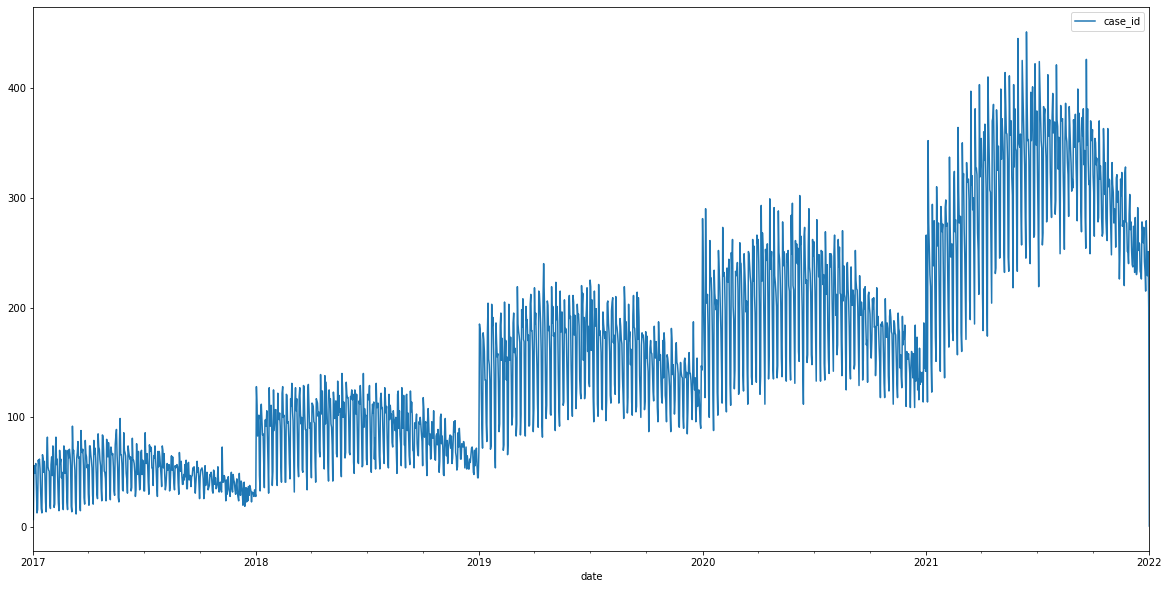

In [34]:
phone_df= pd.pivot_table(cust_case_df[cust_case_df['channel']=='phone'],
              index ='date',
              values='case_id',
              aggfunc='count').fillna(0)

phone_df.plot()

In [35]:
phone_df = phone_df.reset_index()
phone_df['year_month']=phone_df['date'].apply(lambda x: str(x)[:7])

In [36]:
phone_df.head()

,date,case_id,year_month
0,2017-01-01,7,2017-01
1,2017-01-02,56,2017-01
2,2017-01-03,49,2017-01
3,2017-01-04,54,2017-01
4,2017-01-05,58,2017-01


In [37]:
phone_dff = pd.pivot_table(phone_df,
                          index='year_month',
                          values='case_id',
                          aggfunc='sum')

In [38]:
phone_dff = phone_dff.iloc[:-1]

In [39]:
dr2 = pd.date_range(start='1/1/17', end='1/1/22', freq='M')
dr2

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
      

In [40]:
phone_dff['m_freq'] = dr2

In [41]:
phone_dff = phone_dff.set_index('m_freq')
phone_dff.head()

,case_id
m_freq,
2017-01-31,1371
2017-02-28,1350
2017-03-31,1697
2017-04-30,1626
2017-05-31,1894


#### Use of seasonal decompose [Monthly frequency]

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
seasonal_decomp = seasonal_decompose(phone_dff, model="additive")

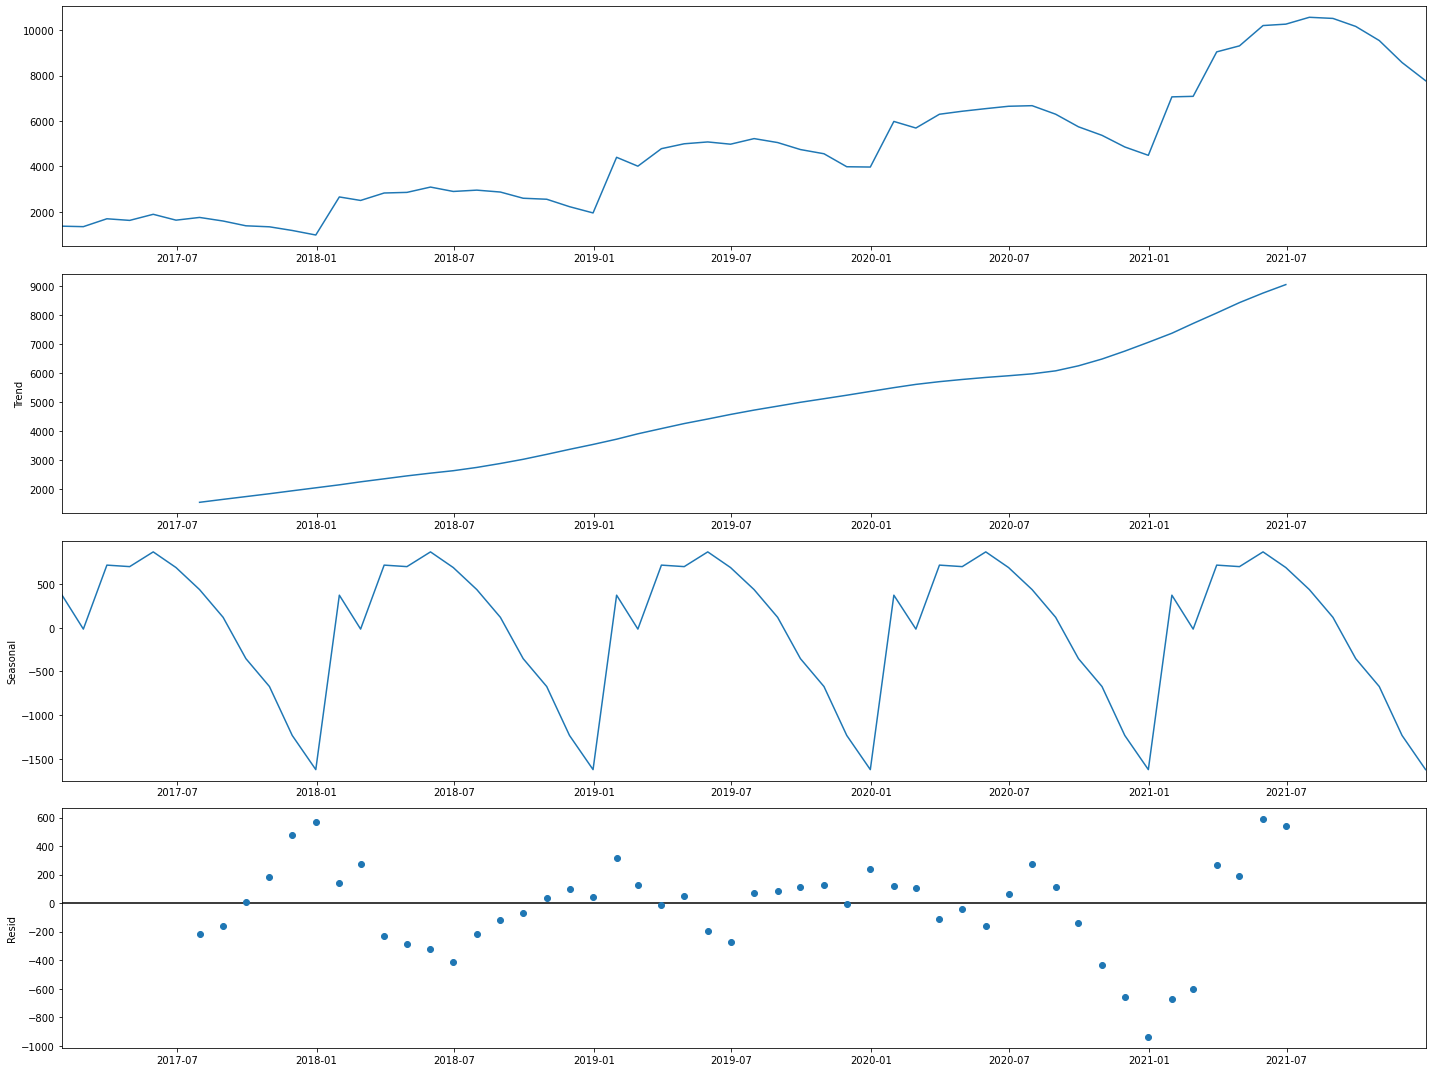

In [44]:
plt.rcParams["figure.figsize"] = (20,15)

seasonal_decomp.plot()
plt.show()

#### ACF and PACF 

In [45]:
phone_dff.head()

,case_id
m_freq,
2017-01-31,1371
2017-02-28,1350
2017-03-31,1697
2017-04-30,1626
2017-05-31,1894


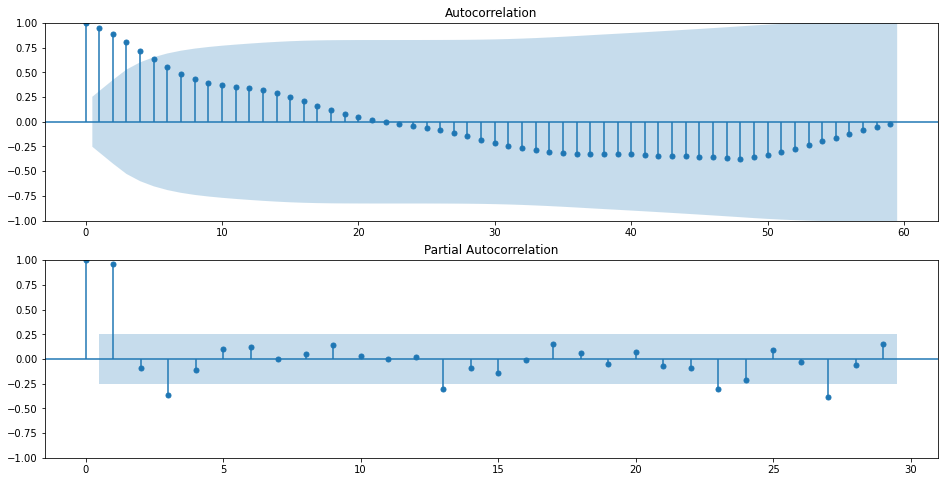

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(phone_dff,lags=59, ax=ax[0])
plot_pacf(phone_dff,lags=29, ax=ax[1])
plt.show()